In [4]:
import numpy as np
import matplotlib.pyplot as plt
from kf import KF

I am given $z_{k} = Hx + \epsilon_{k}$, where $\epsilon_{k}$ is noise on my state vector and $H$ is my observation matrix, which transforms my state vector into the observation domain 

Usually, $H = [1, 0]$ for position-based state vectors since you can't directly observe velo

"The time update equations are responsible for projecting forward the current state and error covariance estimates to obtain the a priori estimates for the next time step. The measurement update equations are responsible for improving the a posteriori estimate by incorporating a new measurement into the a priori estimate."


# Task: use Kalman Filters to track a 1D moving object 

The object's movement can be modelled with function $$f(t) = 0.1(t^2 - t)$$
$$f(t) = 0.1(t - 0)(t - 1)$$

In [15]:
DT = .5
t = np.arange(0,100,DT)
f_t = 0.1 * (t*t - t)

task: track that object using the Kalman Filter from $t=0$ to $t=100$

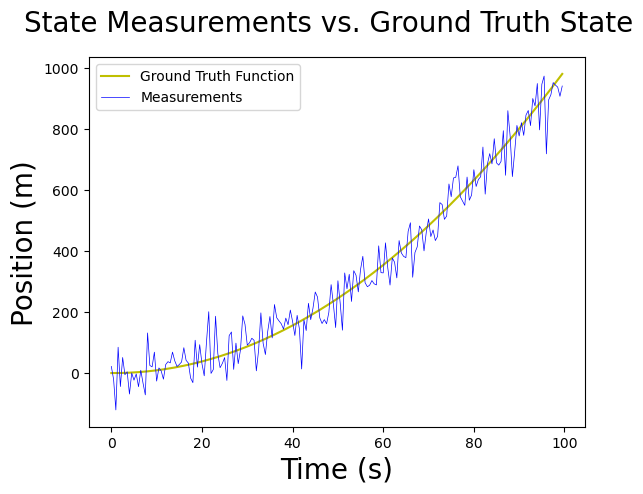

In [16]:
measurements = [x + np.random.normal(0, 50) for x in f_t]

fig = plt.figure()
fig.suptitle('State Measurements vs. Ground Truth State', fontsize=20)
plt.plot(t, f_t, label='Ground Truth Function', color='y', linewidth=1.5)
plt.plot(t, np.array(measurements), label='Measurements', color='b',linewidth=0.5)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Position (m)', fontsize=20)
plt.legend()
plt.show()

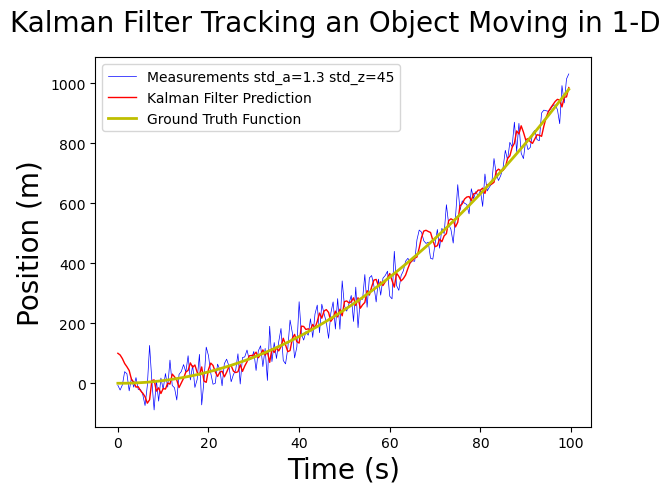

In [19]:
# Matrices definitions
initial_X = np.matrix([[100], [0]])  # initial state (location and velocity)
A = np.matrix([[1, DT], [0, 1]])  # state transition matrix
H = np.matrix([[1, 0]])  # observation matrix
B = np.matrix([[0.5*(DT**2)], [DT]])  # control input matrix
Q = np.eye(2)  # process noise covariance matrix

# initialize kalman filter 
kf = KF(X=initial_X, H=H, A=A, B=B, Q=Q, dt=DT, std_a=1.3, std_z=45)

# Online Kalman Filter Optimization and recording over time. 
predictions: list = []
measurements = np.array([x + np.random.normal(0, kf.std_z) for x in f_t])
for z_k in measurements:
    kf.predict(u=np.matrix([[0]]))  # Assuming no control input
    predictions.append(kf.state[0, 0])  # append the position (first element of state)
    kf.update(np.matrix([[z_k]]))

# turn into np.ndarray for plotting
predicted_positions: np.ndarray = np.array(predictions)
# plot that shit
fig = plt.figure()
fig.suptitle(f'Kalman Filter Tracking an Object Moving in 1-D', fontsize=20)
plt.plot(t, measurements, label=f'Measurements std_a={kf.std_a} std_z={kf.std_z}', color='b',linewidth=0.5)
plt.plot(t, predicted_positions, label='Kalman Filter Prediction', color='r', linewidth=1.)
plt.plot(t, f_t, label='Ground Truth Function', color='y', linewidth=2.)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Position (m)', fontsize=20)
plt.legend()
plt.show()

## Conclusion: Compute Performance of Kalman Filter

In [20]:
# Compute Performance of Kalman Filter
# Mean Absolute Error
measurement_mae = np.mean(np.abs(measurements - f_t))
kf_mae = np.mean(np.abs(predicted_positions - f_t))

# Mean Square Error
measurement_mse = np.mean((measurements - f_t) ** 2)
kf_mse = np.mean((predicted_positions - f_t) ** 2)

# Root Mean Square Error
measurement_rmse = np.sqrt(np.mean((measurements - f_t) ** 2))
kf_rmse = np.sqrt(np.mean((predicted_positions - f_t) ** 2))

# Normalized MAE
measurement_normalized_mae = measurement_mae / np.ptp(f_t)
kf_normalized_mae = kf_mae / np.ptp(f_t)

print(f"Mean Aboslute Error: \
      Measurement={measurement_mae:.2f} KF={kf_mae:.2f}")
print(f"Mean Square Error: \
      Measurement={measurement_mse:.2f} KF={kf_mse:.2f}")
print(f"Root Mean Square Error: \
      Measurement={measurement_rmse:.2f} KF={kf_rmse:.2f}")
print(f"Normalized Mean Aboslute Error: \
      Measurement={measurement_normalized_mae:.2f} KF={kf_normalized_mae:.2f}")

Mean Aboslute Error:       Measurement=35.00 KF=21.24
Mean Square Error:       Measurement=1938.12 KF=756.20
Root Mean Square Error:       Measurement=44.02 KF=27.50
Normalized Mean Aboslute Error:       Measurement=0.04 KF=0.02
